In [1]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
file = "VHA_Center.csv"
file2 = '50_usstates_data.csv'

In [3]:
state_df = pd.read_csv(file2)
state_df

,statename,state,state abbreviation,states,lat,lon
0,ALABAMA,Alabama,AL,Ala.,32.377716,-86.300568
1,ALASKA,Alaska,AK,Alaska,58.301598,-134.420212
2,ARIZONA,Arizona,AZ,Ariz.,33.448143,-112.096962
3,ARKANSAS,Arkansas,AR,Ark.,34.746613,-92.288986
4,CALIFORNIA,California,CA,Calif.,38.576668,-121.493629
5,COLORADO,Colorado,CO,Colo.,39.739227,-104.984856
6,CONNECTICUT,Connecticut,CT,Conn.,41.764046,-72.682198
7,DELAWARE,Delaware,DE,Del.,39.157307,-75.519722
8,FLORIDA,Florida*,FL,Fla.,30.438118,-84.281296
9,GEORGIA,Georgia,GA,Ga.,33.749027,-84.388229


In [4]:
vh_df = pd.read_csv(file,  encoding = "ISO-8859-1")


In [5]:
merge_df = pd.merge(state_df, vh_df, how = 'outer', on='state abbreviation')
merge_df.shape

(188, 10)

In [6]:
vhacountdf = merge_df.groupby(['state']).count()
vhacount_df = vhacountdf.reset_index()
vhacount_df.columns

Index(['state', 'statename', 'state abbreviation', 'states', 'lat', 'lon',
       'StationID', 'Facility', 'Address', 'Phone'],
      dtype='object')

In [7]:
vhacount_df
#create new df 
vhasort_df = vhacount_df.sort_values(by= ['Facility'], ascending= False)
vhasort_df = vhasort_df.reset_index(drop= True)
vhasort_df

,state,statename,state abbreviation,states,lat,lon,StationID,Facility,Address,Phone
0,New York,15,15,15,15,15,15,15,15,14
1,Texas,12,12,12,12,12,12,12,12,12
2,Pennsylvania,10,10,10,10,10,10,10,10,10
3,California,10,10,10,10,10,10,10,10,10
4,Florida*,10,10,10,10,10,9,9,10,9
5,Missouri***,6,6,6,6,6,6,6,6,6
6,Massachusetts,6,6,6,6,6,6,6,6,6
7,Washington,6,6,6,6,6,6,6,6,6
8,Ohio,5,5,5,5,5,5,5,5,5
9,Michigan,5,5,5,5,5,5,5,5,5


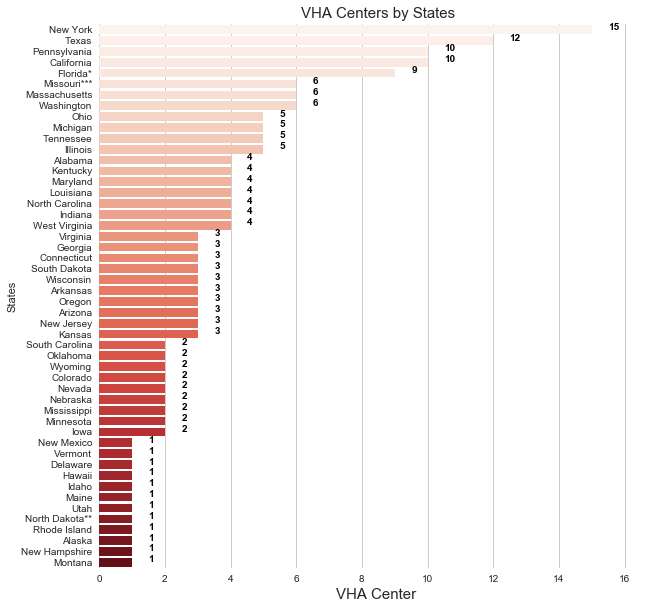

In [8]:
#graph plot State by state comparison of VETERAN suicide
fontsize = 15
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# xposition and y position data 
y_pos = vhasort_df['state']
x_pos =vhasort_df['Facility']

#setting the colors
sns.set_color_codes("pastel")
#color = ["#DF0101", "#B40404", "#DF3A01", "#FF8000", "#FAAC58"]
sns.barplot(x_pos, y_pos,
            label="Total", palette="Reds")

plt.xlim(0,17,5)
# Plot the crashes where alcohol was involved
for i, v in enumerate(x_pos):
    plt.text(v + .5, i , str(v), color='black', fontweight='bold', fontsize = 10)

# Add a legend and informative axis label
plt.title("VHA Centers by States",fontsize = fontsize)
plt.xlabel("VHA Center ", fontsize= fontsize)
plt.ylabel("States")
sns.despine(left=True, bottom=True)
plt.savefig("VHA_center_states")
plt.show() 